In [85]:
import numpy as np
import scipy
import scipy.linalg
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math
import pandas as pd

Problem 1

(i)

In [86]:
def generate_b(t0):
    b = []
    for i in range(1, 11):
        b.append(1/(t0+i) + 1/(t0+i)**2 + 1/(t0+i)**3)
    return b

In [87]:
def generate_A(t0):
    A = np.zeros((10, 3))
    for i in range(1, 11):
        A[i-1][0] = 1/(t0+i)
        A[i-1][1] = 1/(t0+i)**2
        A[i-1][2] = 1/(t0+i)**3
    return A

In [88]:
def get_condATA(A):
    return np.linalg.cond(np.dot(A.T, A))

In [89]:
def get_condA(A):
    return np.linalg.cond(A)

In [90]:
def get_xnorm(A, b):
    ATA = np.dot(A.T, A)
    ATA_inv = np.linalg.inv(ATA)
    return np.dot(ATA_inv, np.dot(A.T, b))

In [91]:
def get_xorth(A, b):
    Q, R = scipy.linalg.qr(A)
    return np.dot(np.linalg.inv(R[0:3]), np.dot(Q.T, b)[0:3])

In [92]:
get_xnorm(generate_A(0), generate_b(0))

array([1., 1., 1.])

In [93]:
get_xorth(generate_A(0), generate_b(0))

array([1., 1., 1.])

In [94]:
A = generate_A(0)

In [95]:
x_ex = [1, 1, 1]

In [96]:
results = np.zeros((5, 5))

In [97]:
for i in range(0, 201, 50):
    A = generate_A(i)
    b = generate_b(i)
    x_norm = get_xnorm(A, b)
    x_orth = get_xorth(A, b)
    
    results[i//50][0] = i
    
    results[i//50][1] = get_condATA(A)
    
    results[i//50][2] = get_condA(A)
    
    results[i//50][3] = np.linalg.norm(x_norm-x_ex)
    
    results[i//50][4] = np.linalg.norm(x_orth-x_ex)

In [99]:
df = pd.DataFrame(results, columns=['$t_0$', '$𝜅_2(𝐴^𝑇𝐴)$','$𝜅_2(𝐴)$','||𝑥^{𝑛𝑜𝑟𝑚}-𝑥^{𝑒𝑥}||_2', '||𝑥^{𝑜𝑟𝑡ℎ}-𝑥^{𝑒𝑥}||_2'])
df.set_index('$t_0$')

,$𝜅_2(𝐴^𝑇𝐴)$,$𝜅_2(𝐴)$,||𝑥^{𝑛𝑜𝑟𝑚}-𝑥^{𝑒𝑥}||_2,||𝑥^{𝑜𝑟𝑡ℎ}-𝑥^{𝑒𝑥}||_2
$t_0$,,,,
0.0,2.096205e+03,4.578434e+01,2.604893e-13,2.589463e-15
50.0,1.658990e+12,1.288018e+06,2.385350e-07,5.746704e-11
100.0,2.884738e+14,1.698452e+07,1.526170e-05,3.281801e-10
150.0,6.452086e+15,8.032488e+07,6.105192e-05,8.734913e-10
200.0,6.011692e+16,2.451875e+08,2.441481e-04,1.538277e-08


(ii)

According to Theorem 5.4.1, we know that the computational error $||x^{comp} - x^{ex}||_2$ is postively related with the conditional number of $A$ in LLS problem. According to Theorem 7.6.2, the conditional number of $A^TA$ is the square of $A$'s. Therefore, when we compute x through normal equation ($A^TAx = A^Tb$), it will introduce more errors into the solution because of the larger conditional number compared to that from QR decomposition ($Ax = b$). We can see the difference in errors from what we computed in the table.

Problem 3

(iii)

In [296]:
def hd_A(A):
    (m,n) = np.shape(A)

    e1 = np.zeros(m)
    e1[0]=1
    e2 = np.zeros(m-1)
    e2[0]=1
    
    u1 = A[:,0] + np.sign(A[0][0]) *np.linalg.norm(A[:, 0])* e1
    v1 = u1 / np.linalg.norm(u1)
    Q1 = np.identity(m) - 2*np.outer(v1,v1.T)
    
    A = np.dot(Q1, A)
    
    u2 = A[1:,1] + np.sign(A[1][1]) *np.linalg.norm(A[1:,1])* e2
    v2 = u2 / np.linalg.norm(u2)
    Q2 = np.identity(m)
    Q2[1:,1:] = np.identity(m-1) - 2*np.outer(v2,v2.T)
    
    R = np.dot(Q2, A)
    
    return Q1, Q2

In [297]:
A = np.zeros((10, 2))

In [298]:
for i in range(10):
    A[i][0] = 1
    A[i][1] = (i+1)/5

In [299]:
A

array([[1. , 0.2],
       [1. , 0.4],
       [1. , 0.6],
       [1. , 0.8],
       [1. , 1. ],
       [1. , 1.2],
       [1. , 1.4],
       [1. , 1.6],
       [1. , 1.8],
       [1. , 2. ]])

In [300]:
Q1, Q2= hd_A(A)

In [301]:
print(Q1)

[[-0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777
  -0.31622777 -0.31622777 -0.31622777 -0.31622777]
 [-0.31622777  0.92402531 -0.07597469 -0.07597469 -0.07597469 -0.07597469
  -0.07597469 -0.07597469 -0.07597469 -0.07597469]
 [-0.31622777 -0.07597469  0.92402531 -0.07597469 -0.07597469 -0.07597469
  -0.07597469 -0.07597469 -0.07597469 -0.07597469]
 [-0.31622777 -0.07597469 -0.07597469  0.92402531 -0.07597469 -0.07597469
  -0.07597469 -0.07597469 -0.07597469 -0.07597469]
 [-0.31622777 -0.07597469 -0.07597469 -0.07597469  0.92402531 -0.07597469
  -0.07597469 -0.07597469 -0.07597469 -0.07597469]
 [-0.31622777 -0.07597469 -0.07597469 -0.07597469 -0.07597469  0.92402531
  -0.07597469 -0.07597469 -0.07597469 -0.07597469]
 [-0.31622777 -0.07597469 -0.07597469 -0.07597469 -0.07597469 -0.07597469
   0.92402531 -0.07597469 -0.07597469 -0.07597469]
 [-0.31622777 -0.07597469 -0.07597469 -0.07597469 -0.07597469 -0.07597469
  -0.07597469  0.92402531 -0.07597469 -0.07597469]


In [302]:
print(Q2)

[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.26630785 -0.15621147 -0.0461151   0.06398128  0.17407766
   0.28417403  0.39427041  0.50436679  0.61446316]
 [ 0.         -0.15621147  0.98072979 -0.00568875  0.00789272  0.02147418
   0.03505565  0.04863712  0.06221858  0.07580005]
 [ 0.         -0.0461151  -0.00568875  0.99832063  0.00233     0.00633938
   0.01034876  0.01435813  0.01836751  0.02237689]
 [ 0.          0.06398128  0.00789272  0.00233     0.99676729 -0.00879542
  -0.01435813 -0.01992085 -0.02548356 -0.03104627]
 [ 0.          0.17407766  0.02147418  0.00633938 -0.00879542  0.97606978
  -0.03906503 -0.05419983 -0.06933463 -0.08446943]
 [ 0.          0.28417403  0.03505565  0.01034876 -0.01435813 -0.03906503
   0.93622808 -0.08847881 -0.1131857  -0.13789259]
 [ 0.          0.39427041  0.04863712  0.01435813 -0.01992085 -0.05419983
  -0.08847881  0.87724221 -0.15703677 -0.19131575]
 [ 0.   

In [303]:
def hd_At(At, Q1, Q2):
    (m,n) = np.shape(A)
    
    e3 = np.zeros(m-2)
    e3[0]=1
    At = np.dot(Q2, np.dot(Q1, At))
    
    u3 = At[2:,2] + np.sign(At[2][2]) *np.linalg.norm(At[2:,2])* e3
    v3 = u3 / np.linalg.norm(u3)
    Q3 = np.identity(m)
    Q3[2:,2:] = np.identity(m-2) - 2*np.outer(v3,v3.T)
    
    R = np.dot(Q3, At)
    
    return Q3, R
    

In [304]:
At = np.zeros((10, 3))

In [305]:
for i in range(10):
    At[i][0] = 1
    At[i][1] = (i+1)/5
    At[i][2] = ((i+1)/5)**2

In [306]:
Q3, R = hd_At(At, Q1, Q2)

In [307]:
b = np.zeros(10)

In [308]:
for i in range(10):
    b[i] = 1 + (i+1)/5 + ((i+1)/5)**2

In [309]:
R_inv = np.linalg.inv(R[:3, :3])

In [310]:
R_inv

array([[-3.16227766e-01, -6.05530071e-01,  9.57427108e-01],
       [ 7.56593844e-16,  5.50481883e-01, -2.39356777e+00],
       [-2.91441526e-16, -5.79998882e-16,  1.08798535e+00]])

In [311]:
x_hd = np.dot(R_inv, np.dot(Q3, np.dot(Q2, np.dot(Q1, b)))[:3])

In [312]:
x_hd

array([1., 1., 1.])

In [294]:
x_ls = np.linalg.lstsq(At, b)[0]

<ipython-input-294-73fbeacd67f2>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_ls = np.linalg.lstsq(At, b)[0]


In [295]:
x_ls

array([1., 1., 1.])

 Problem 4

(i)

In [75]:
def generate_B(h, a, b, n):
    res = np.zeros((n, n))
    for i in range(n):
        res[i][i] = 2*a + h*b
        res[i][(i+1)%n] = -a
        res[i][(i+n-1)%n] = -(a + h*b)
    res = -res* h**-2
    return res

In [76]:
B = generate_B(1/101, 0.01, 1, 100)

In [104]:
t = np.linspace(0, 2, 100)

In [105]:
x0 = np.zeros(100)

In [106]:
s = np.linspace(0, 1, 100)

In [107]:
for i in range(100):
    x0[i] = math.exp(-(s[i]-0.3)**2/0.01)

In [108]:
xt = np.zeros([100, 100])


In [109]:
for i in range(100):
    xt[:,i] = np.dot(scipy.linalg.expm(np.dot(B, t[i])), x0) 

In [110]:
xt.shape

(100, 100)

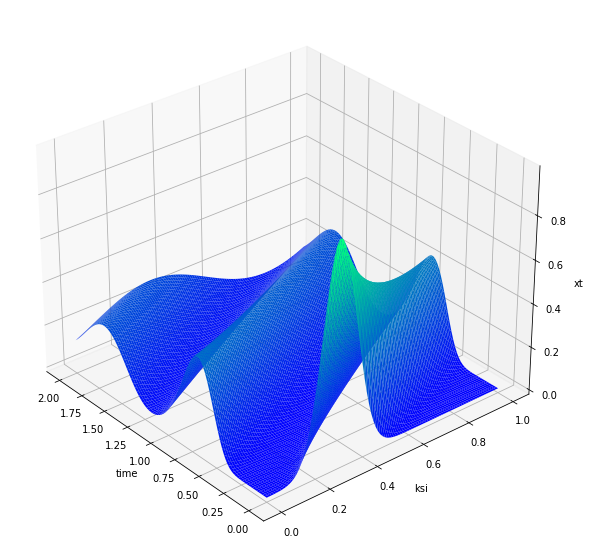

In [111]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

#x = np.arange(-5, 5.1, 0.2)
#y = np.arange(-5, 5.1, 0.2)

#X, Y = np.meshgrid(x, y)
#Z = np.sin(X)*np.cos(Y)

#t, s = np.meshgrid(t, s)
X, Y = np.meshgrid(t, s)
ax.plot_surface(X, Y, xt, rstride=1, cstride=1, cmap='winter', edgecolor='none', lw=1.8)
ax.set_xlabel('time')
ax.set_ylabel('ksi')
ax.set_zlabel('xt')
ax.invert_xaxis()

ax.view_init(azim=320)

plt.show()


(ii)

The least squares problem Ax = b is defined by:

$A = H*exp(Bt) \in R^{mk \times n}$

$b = [z_1, z_2, ..., z_m]^T \in R^{mk \times 1}$, where: $z_i = Hx(t_i), i =1,2, ..., m$

$x = x_0 \in R^{n}$

(iii)

In [123]:
n = 100
H = np.zeros((n, n))
k = 20

In [124]:
for i in range(n):
    if n/k*(i+1) <= 100:
        j = int(n/k*(i+1) - 1)
        H[i][j] = 1

In [125]:
def generate_E(B, t):
    E = scipy.linalg.expm(B*t)
    return E

In [126]:
def generate_z(H, E, x0):
    z = np.dot(np.dot(H, E),x0)
    return z

In [156]:

A = np.empty([1,n])
b = np.empty([1,1])

In [157]:
for ti1 in range(2,51,2):
    ti = ti1/100
    E = generate_E(B,ti)
    ai = np.dot(H,E)
    bi = generate_z(H,E,x0).reshape((k,1))
    A = np.vstack((A,ai))
    b = np.vstack((b,bi))

In [158]:
print(A.shape)

(501, 100)


In [166]:
y = 0.5

In [178]:
x0_ls = np.linalg.lstsq(A[1:,:],b[1:,:],rcond=None)[0]

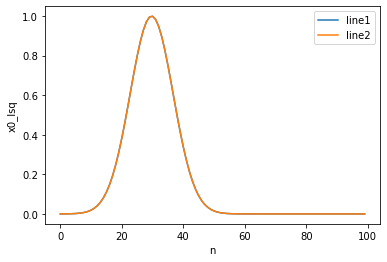

In [177]:
plt.plot(x0, label = 'x0')
plt.plot(x0_ls, label = 'x0_lsq')
plt.xlabel('n')
plt.ylabel('x0_lsq')
plt.legend()
plt.show()

(iv)

In [179]:
A = np.empty([1,n])
b = np.empty([1,1])

In [180]:
for ti1 in range(2,51,2):
    ti = ti1/100
    E = generate_E(B,ti)
    ai = np.dot(H,E)
    bi = ((1 + 0.1*np.random.randn(k))*genz(H,E,x0)).reshape((k,1))
    A = np.vstack((A,ai))
    b = np.vstack((b,bi))

In [181]:
x0_ls = np.linalg.lstsq(A[1:,:],b[1:,:],rcond=None)[0]

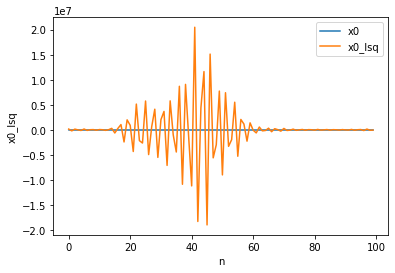

In [182]:
plt.plot(x0, label = 'x0')
plt.plot(x0_ls, label = 'x0_lsq')
plt.xlabel('n')
plt.ylabel('x0_lsq')
plt.legend()
plt.show()

(v)

In [184]:
U,sigma,V = np.linalg.svd(A[1:,:])
print("The condition number of A is:", sigma[1]/sigma[-1])

The condition number of A is: 75271048949745.55


We can see that the condition number of A is very large. Since the computational error is postive related with the conditional number of 𝐴 in LLS problem, even if we only add a small error to zj, it can lead to large perturbation.